In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_17_26/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingInit",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_1StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_1StepBeforeFail_TrackTrainingInit_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_2StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_2StepBeforeFail_TrackTrainingInit_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_3StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_3StepBeforeFail_TrackTrainingInit_InitSet"]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(38880, 85)
(38880, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  1
DataSet Sizes: 
(41539, 85)
(41539, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  2
DataSet Sizes: 
(44392, 85)
(44392, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  3
DataSet Sizes: 
(47469, 85)
(47469, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  4
DataSet 

In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 14
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [7]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs = 4000, batch_size = 1280, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/4000
43/43 [==============================] - 0s 7ms/step - loss: 0.0908 - val_loss: 0.0251
Epoch 2/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0142
Epoch 3/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.0125
Epoch 4/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0115
Epoch 5/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0106
Epoch 6/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.0099
Epoch 7/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.0092
Epoch 8/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0087
Epoch 9/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.0081
Epoch 10/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0077

43/43 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 83/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 84/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 85/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 86/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 87/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 88/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 89/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 90/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 91/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0032
Epoc

43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 163/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 164/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 165/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 166/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 167/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 168/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 169/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 170/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 171/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 243/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 244/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 245/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 246/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 247/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 248/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 249/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 250/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 251/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 323/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 324/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 325/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 326/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 327/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 328/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 329/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 330/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 331/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 403/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 404/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 405/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 406/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 407/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 408/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 409/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 410/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 411/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 483/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 484/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 485/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 486/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 487/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 488/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 489/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 490/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 491/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 563/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 564/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 565/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 566/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 567/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 568/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 569/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 570/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 571/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 643/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 644/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 645/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 646/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 647/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 648/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 649/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 650/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 651/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 723/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 724/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 725/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 726/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 727/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 728/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 729/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 730/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 731/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 803/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 804/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 805/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 806/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 807/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 808/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 809/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 810/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 811/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 883/4000
43/43 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 884/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 885/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 886/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 887/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 888/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 889/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 890/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 891/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 963/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 964/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 965/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 966/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 967/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 968/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 969/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 970/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 971/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1043/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1044/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1045/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1046/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1047/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1048/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1049/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1050/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 1051/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1122/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1123/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1124/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1125/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1126/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1127/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1128/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1129/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1130/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1201/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1202/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1203/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1204/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1205/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1206/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1207/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 1208/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 1209/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0025 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1280/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 1281/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 1282/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1283/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1284/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1285/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1286/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 1287/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1288/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1359/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1360/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1361/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1362/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1363/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1364/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1365/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1366/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1367/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1438/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1439/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1440/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1441/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1442/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 1443/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1444/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 1445/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1446/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0024 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1517/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1518/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1519/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1520/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1521/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1522/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1523/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1524/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1525/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1596/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1597/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1598/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1599/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1600/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1601/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1602/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1603/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1604/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1675/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1676/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1677/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1678/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1679/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1680/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 1681/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1682/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1683/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1754/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1755/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1756/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1757/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1758/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1759/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1760/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1761/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1762/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1833/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1834/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1835/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1836/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1837/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1838/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1839/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1840/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1841/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0022 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1912/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1913/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1914/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1915/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1916/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1917/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1918/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1919/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 1920/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1991/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1992/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1993/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1994/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 1995/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1996/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1997/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1998/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1999/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2070/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2071/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2072/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2073/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2074/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2075/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2076/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2077/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2078/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2149/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2150/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2151/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2152/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2153/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2154/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2155/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2156/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 2157/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2228/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2229/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2230/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2231/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2232/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2233/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2234/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2235/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 2236/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2307/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2308/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2309/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2310/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2311/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2312/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2313/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 2314/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2315/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2386/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2387/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2388/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2389/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2390/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2391/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2392/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2393/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2394/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2465/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2466/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2467/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2468/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2469/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2470/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2471/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2472/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2473/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2544/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2545/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2546/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2547/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2548/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2549/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2550/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2551/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2552/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2623/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2624/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2625/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2626/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2627/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2628/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2629/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 2630/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2631/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0020 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2702/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 2703/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2704/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2705/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2706/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2707/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2708/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2709/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2710/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2781/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2782/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2783/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2784/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2785/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2786/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 2787/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2788/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2789/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2860/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2861/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2862/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2863/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2864/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2865/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2866/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2867/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2868/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2939/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2940/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2941/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2942/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2943/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2944/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2945/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2946/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2947/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3018/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3019/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3020/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3021/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3022/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3023/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3024/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3025/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3026/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0019 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3097/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3098/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3099/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3100/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3101/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3102/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3103/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3104/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3105/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3176/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3177/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3178/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3179/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3180/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3181/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3182/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3183/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3184/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3255/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3256/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3257/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3258/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3259/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3260/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3261/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3262/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3263/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3334/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3335/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3336/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3337/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3338/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3339/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3340/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3341/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3342/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3413/4000
43/43 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3414/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3415/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3416/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3417/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3418/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3419/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3420/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3421/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3492/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3493/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3494/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3495/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3496/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3497/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3498/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3499/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3500/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3571/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3572/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3573/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3574/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3575/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3576/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3577/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3578/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3579/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0018 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3650/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3651/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3652/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3653/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3654/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3655/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3656/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3657/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3658/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3729/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3730/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3731/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3732/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3733/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3734/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3735/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3736/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3737/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3808/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3809/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3810/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3811/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3812/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3813/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3814/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3815/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3816/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3887/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3888/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3889/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3890/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3891/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3892/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3893/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3894/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3895/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3966/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3967/4000
43/43 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3968/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3969/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3970/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3971/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3972/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3973/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3974/4000
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - val

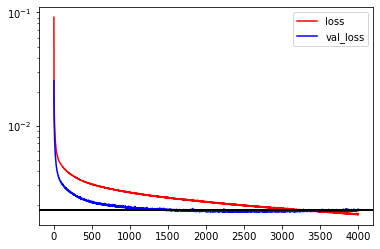

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.axhline(y=0.0018, xmin=0, xmax=5, linewidth=2, color = 'k')
plt.show()

In [9]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "Aug_1Time_EarlyStopping"
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26//ML_Models/NN_Model_Aug_1Time_EarlyStopping/assets


In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [11]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 0
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.16898236e-01  1.36893514e-02  7.78614581e-01  1.60702856e-01
 -1.00131502e-01 -2.82221670e-02 -4.23586116e-08 -4.66310963e-08
  3.62160760e-09 -3.04074891e-01  1.84197779e-01  8.60246897e-02
  1.00000000e+00  1.10000022e-01  1.12409997e+00  1.44698797e-01
 -4.64999978e-01  1.11437414e+00  2.23371473e-01 -4.64999978e-01
  1.21929106e-01  1.00681383e-01  1.10000022e-01  1.31654942e-01
  2.20087066e-02  1.10000022e-01  1.34375748e-01  1.02889919e-13
 -4.64999978e-01  1.34375748e-01  1.02889919e-13 -4.64999978e-01
 -8.73236732e-01  1.02876041e-13  1.10000022e-01 -8.73236732e-01
  1.02876041e-13  6.85000022e-01  1.11519838e+00  2.16704166e-01
  1.10000022e-01  1.12327573e+00  1.51366104e-01  1.10000022e-01
  1.30830702e-01  2.86760141e-02  6.85000022e-01  1.22753345e-01
  9.40140759e-02  6.85000022e-01  1.22180474e-01  9.86480555e-02
  1.10000022e-01  1.31403573e-01  2.40420345e-02  1.10000022e-01
 -8.61041459e-01 -9.86480555e-02  6.85000022e-01 -8.70264558e-01
 -2.40420345e-02  1.26000

Data Kept Original Form, But need to scale back to meters
[0.29644453 0.29678522 0.2968175  0.29685007 0.29691837 0.29698679
 0.2970185  0.29702092 0.29722187 0.29729941 0.29733828 0.29734895
 0.29746149 0.29753177 0.29762784 0.29766584 0.29767909 0.2977769
 0.2977914  0.29780879 0.29814778 0.29831948 0.2983387  0.29880468
 0.29904631 0.29906654 0.29923745 0.29943952 0.29946899 0.29951876
 0.29957451 0.29959277 0.29974535 0.29975953 0.29979646 0.29979876
 0.29985843 0.2999434  0.30008945 0.30022467 0.30024541 0.30028079
 0.30034772 0.30040015 0.30067759 0.3009205  0.30112592 0.30117058
 0.30125622 0.30143948 0.30166114 0.30176618 0.3018799  0.3019451
 0.30206937 0.30211716 0.30251606 0.30253512 0.30290977 0.30305206
 0.30315562 0.30323753 0.30346673 0.30358417 0.30362393 0.30367123
 0.30373659 0.30382828 0.30389596 0.30399088 0.30421694 0.30427112
 0.3043107  0.30444947 0.30458647 0.3047701  0.30494815 0.3049599
 0.30496342 0.3050408  0.30510668 0.30520477 0.30522688 0.3052362
 0.30532

(array([ 3.,  8.,  6.,  4.,  5.,  2.,  3.,  1.,  5.,  5.,  3.,  0.,  1.,
         4.,  0., 10.,  2.,  2.,  0.,  1.,  3.,  8.,  6.,  3.,  2.,  0.,
         4.,  7.,  1.,  1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        , 14.93333333, 15.86666667, 16.8       , 17.73333333,
        18.66666667, 19.6       , 20.53333333, 21.46666667, 22.4       ,
        23.33333333, 24.26666667, 25.2       , 26.13333333, 27.06666667,
        28.        ]),
 <a list of 30 Patch objects>)

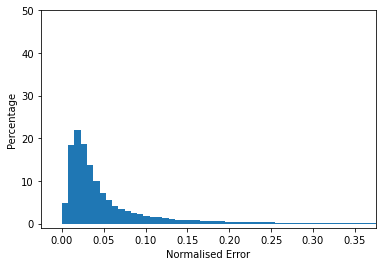

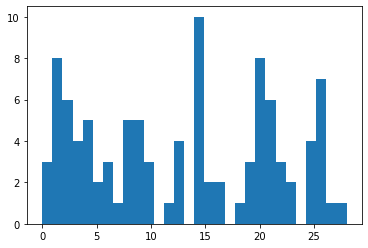

In [12]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
#err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)
err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.01853341 0.0209395  0.0221938  ... 1.20025157 1.23166894 1.55792863]
Error Mean:  0.11656820222300647
Error Std 0.11057566565288174


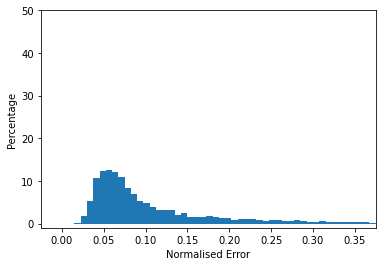

In [13]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.01853341 0.0209395  0.0221938  ... 1.20025157 1.23166894 1.55792863]
Error Mean:  0.11656820222300647
Error Std 0.11057566565288174


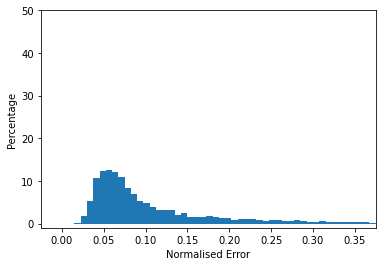

In [14]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())